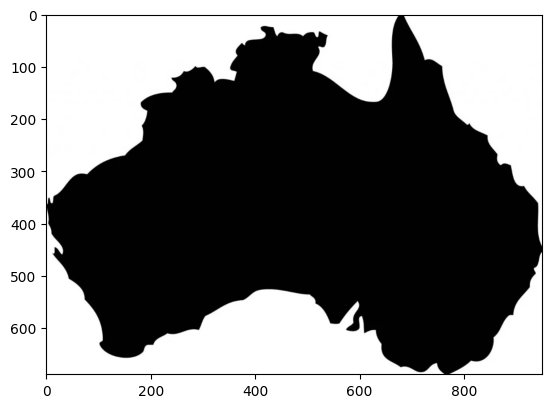

In [223]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
cv_image = cv2.imread("..\Australia.png")
plt.imshow(cv_image)
plt.show()

In [224]:
import random
import numpy as np

epsilon = 0.001

def if_point_in_square(left, lower, right, upper, x, y):
    return (x >= left and x <= right and y <= upper and y >= lower)

def MonteCarlo(circles, left, lower, right, upper, cv_image, treshold = 0.4):
    cnt = 0
    min_x = min(left, right)
    max_x = max(left, right)
    min_y = min(upper, lower)
    max_y = max(upper, lower)
    
    if min_x < 0 or min_y < 0 or max_x < 0 or max_y < 0:
        return False

    if min_x >= cv_image.shape[1] or min_y >= cv_image.shape[0] or max_x >= cv_image.shape[1] or max_y >= cv_image.shape[0]:
        return False
    
    for i in range(0, circles):
        random.seed(2 * i + 1)
        x = random.randint(min_x, max_x)
        y = random.randint(min_y, max_y)
        
        if if_point_in_square(min_x, min_y, max_x, max_y, x, y) and np.all(cv_image[y][x] == np.array([1, 1, 1])):
            cnt += 1
    
    if cnt * 1. / circles >= treshold:
        #print(cnt)
        return True
    return False


In [225]:
from PIL import Image, ImageDraw

def split_image_and_draw_grid(image_path, num_rows, num_cols, circles):
    # Open the image
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)

    # Get image size
    width, height = image.size

    # Calculate rectangle dimensions
    rect_width = width // num_cols
    rect_height = height // num_rows

    # Create a NumPy array representing the image
    cv_image = np.array(image)

    rectangles_coordinates = []

    # Draw grid and apply Monte Carlo
    for i in range(num_rows):
        for j in range(num_cols):
            left = j * rect_width
            upper = i * rect_height
            right = left + rect_width
            lower = upper + rect_height

            # Apply Monte Carlo
            if MonteCarlo(circles, left, lower, right, upper, cv_image):
                # Draw rectangles
                draw.rectangle([left, upper, right, lower], outline='red')
                rectangles_coordinates.append([(left, upper), (right, upper), (right, lower), (left, lower)])

    # Display the image with the drawn rectangles
    #image.show()
    image.save("squares.png")

    return rectangles_coordinates, rect_width, rect_height

# Path to the image
image_path = "..\Australia.png"

# Grid dimensions
num_rows = 5
num_cols = 5

# Parameters for Monte Carlo
circles = 1000
threshold = 0.5

# Get coordinates of rectangles and draw the grid
coordinates, width, hight = split_image_and_draw_grid(image_path, num_rows, num_cols, circles)

# Output coordinates of each rectangle
#for i, coord in enumerate(coordinates, start=1):
#    print(f"Rectangle {i} coordinates: {coord}")


In [226]:
id_coord = []
for coordinate in coordinates:
    for i in range(0, len(coordinate)):
        id_coord.append(coordinate[i])

id_coord = (list(set(id_coord)))
id_coord.sort()
id_coord

[(0, 274),
 (0, 411),
 (0, 548),
 (190, 137),
 (190, 274),
 (190, 411),
 (190, 548),
 (380, 0),
 (380, 137),
 (380, 274),
 (380, 411),
 (380, 548),
 (570, 0),
 (570, 137),
 (570, 274),
 (570, 411),
 (570, 548),
 (570, 685),
 (760, 137),
 (760, 274),
 (760, 411),
 (760, 548),
 (760, 685)]

In [227]:
matrix_np = np.zeros((len(id_coord), len(id_coord)))
a_x = 1.
a_y = 1.
for i in range(0, len(id_coord)):
    cnt1 = 0
    cnt2 = 0
    max_1 = 0
    max_2 = 0

    for s in range(0, len(id_coord)):
        if (i != s and id_coord[i][0] == id_coord[s][0]):
                if  id_coord[s][1] - id_coord[i][1] >= max_1:
                    max_1 = id_coord[s][1] - id_coord[i][1]

    cnt1 = max_1 / hight

    for s in range(0, len(id_coord)):
        if (i != s and id_coord[i][1] == id_coord[s][1]):
                if  id_coord[s][0] - id_coord[i][0] >= max_2:
                    max_2 = id_coord[s][0] - id_coord[i][0]

    cnt2 = max_2 / width
    if i == 1:
          print("cnt  ", cnt1, cnt2)

    for j in range(0, len(id_coord)):
        
        if cnt1 >= 4:
            if i == j:
                 matrix_np[i][j] += 35./12 * (a_y)

            if (id_coord[i][0] == id_coord[j][0] and (id_coord[i][1] - id_coord[j][1]) == hight):
                    matrix_np[i][j] = a_y * (-26./3)

            if (id_coord[i][0] == id_coord[j][0] and (id_coord[i][1] - id_coord[j][1]) == 2 * hight):
                    matrix_np[i][j] = a_y * (19./2)

            if (id_coord[i][0] == id_coord[j][0] and (id_coord[i][1] - id_coord[j][1]) == 3 * hight):
                    matrix_np[i][j] = a_y * (-14./3)

            if (id_coord[i][0] == id_coord[j][0] and (id_coord[i][1] - id_coord[j][1]) == 4 * hight):
                    matrix_np[i][j] = a_y * (11./12)

        if cnt1 == 3:
            if i == j:
                 matrix_np[i][j] += 2. * (a_y)

            if (id_coord[i][0] == id_coord[j][0] and (id_coord[i][1] - id_coord[j][1]) == hight):
                    matrix_np[i][j] = a_y * (-5.)

            if (id_coord[i][0] == id_coord[j][0] and (id_coord[i][1] - id_coord[j][1]) == 2 * hight):
                    matrix_np[i][j] = a_y * (4.)

            if (id_coord[i][0] == id_coord[j][0] and (id_coord[i][1] - id_coord[j][1]) == 3 * hight):
                    matrix_np[i][j] = a_y * (-1.)

        if cnt1 == 2:
            if i == j:
                 matrix_np[i][j] += 1. * (a_y)

            if (id_coord[i][0] == id_coord[j][0] and (id_coord[i][1] - id_coord[j][1]) == hight):
                    matrix_np[i][j] = a_y * (-2.)

            if (id_coord[i][0] == id_coord[j][0] and (id_coord[i][1] - id_coord[j][1]) == 2 * hight):
                    matrix_np[i][j] = a_y * (1.)


        if cnt1 == 0:
            if i == j:
                 matrix_np[i][j] += 2. * (a_y)

            if (id_coord[i][0] == id_coord[j][0] and (id_coord[i][1] - id_coord[j][1]) == -1. * hight):
                    matrix_np[i][j] = a_y * (-2.)

        
        if cnt1 == 1:
            if i == j:
                 matrix_np[i][j] += -2. * (a_y)

            if (id_coord[i][0] == id_coord[j][0] and (id_coord[i][1] - id_coord[j][1]) == -1. * hight):
                    matrix_np[i][j] = a_y * (1.)

            if (id_coord[i][0] == id_coord[j][0] and (id_coord[i][1] - id_coord[j][1]) == 1. * hight):
                    matrix_np[i][j] = a_y * (1.)


        if cnt2 >= 4:
            if i == j:
                 matrix_np[i][j] += 35./12 * (a_x)

            if (id_coord[i][1] == id_coord[j][1] and abs(id_coord[i][0] - id_coord[j][0]) == width):    
                matrix_np[i][j] += a_x * (-26./3)

            if (id_coord[i][1] == id_coord[j][1] and abs(id_coord[i][0] - id_coord[j][0]) == 2 * width):    
                matrix_np[i][j] += a_x * (19./2)

            if (id_coord[i][1] == id_coord[j][1] and abs(id_coord[i][0] - id_coord[j][0]) == 3 * width):    
                matrix_np[i][j] += a_x * (-14./3)

            if (id_coord[i][1] == id_coord[j][1] and abs(id_coord[i][0] - id_coord[j][0]) == 4 * width):    
                matrix_np[i][j] += a_x * (11./12)

        if cnt2 == 3:
            if i == j:
                 matrix_np[i][j] += 2. * (a_x)

            if (id_coord[i][1] == id_coord[j][1] and abs(id_coord[i][0] - id_coord[j][0]) == width):
                    matrix_np[i][j] = a_x * (-5.)

            if (id_coord[i][1] == id_coord[j][1] and abs(id_coord[i][0] - id_coord[j][0]) == 2 * width):
                    matrix_np[i][j] = a_x * (4.)

            if (id_coord[i][1] == id_coord[j][1] and abs(id_coord[i][0] - id_coord[j][0]) == 3 * width):
                    matrix_np[i][j] = a_x * (-1.)

        if cnt2 == 2:
            if i == j:
                 matrix_np[i][j] += 1. * (a_x)

            if (id_coord[i][1] == id_coord[j][1] and (id_coord[i][0] - id_coord[j][0]) == width):
                    matrix_np[i][j] = a_x * (-2.)

            if (id_coord[i][1] == id_coord[j][1] and (id_coord[i][0] - id_coord[j][0]) == 2 * width):
                    matrix_np[i][j] = a_x * (1.)


        if cnt2 == 0:
            if i == j:
                 matrix_np[i][j] += 2. * (a_x)

            if (id_coord[i][1] == id_coord[j][1] and (id_coord[i][0] - id_coord[j][0]) == -1. * width):
                    matrix_np[i][j] = a_x * (-2.)

        
        if cnt2 == 1:
            if i == j:
                 matrix_np[i][j] += -2. * (a_x)

            if (id_coord[i][1] == id_coord[j][1] and (id_coord[i][0] - id_coord[j][0]) == -1. * width):
                    matrix_np[i][j] = a_x * (1.)

            if (id_coord[i][1] == id_coord[j][1] and (id_coord[i][0] - id_coord[j][0]) == 1. * width):
                    matrix_np[i][j] = a_x * (1.)
          
        

cnt   1.0 4.0


In [228]:
matrix_np[1]

array([ 1.        ,  0.91666667,  1.        ,  0.        ,  0.        ,
       -8.66666667,  0.        ,  0.        ,  0.        ,  0.        ,
        9.5       ,  0.        ,  0.        ,  0.        ,  0.        ,
       -4.66666667,  0.        ,  0.        ,  0.        ,  0.        ,
        0.91666667,  0.        ,  0.        ])

In [229]:
X_start = []
for i in range(0, len(id_coord)):
    if i != 7:
        X_start.append(0.001)

    else:
        X_start.append(0.1)


Nt = 1000
tmax = 3.

t_array = np.linspace(0.,tmax, Nt)
dt = t_array[1] - t_array[0]
dh = 0.00001
nt = len(t_array)
X = []
X.append(X_start) 

identity_matrix = np.eye(len(id_coord))

b_matrix = identity_matrix - np.array(matrix_np)* dt / dh ** 2
inverse_matrix = np.linalg.inv(np.array(b_matrix))



In [230]:
def MNK():

    rightX = []
    for j in range(0, len(id_coord)):
        rightX.append(X[0][j])
    
    resX = rightX @ inverse_matrix
    X.append(resX)

    rightX = []
    a2 = 4/3
    a3 = -1/3
    for j in range(0, len(id_coord)):
        rightX.append(a2 * X[1][j] + a3 * X[0][j])
    
    resX = rightX @ inverse_matrix
    X.append(resX)


    for i in range(3, Nt):
    
        alpha1 = 18/11
        alpha2 = -9/11
        alpha3 = 2/11
        rightX = []
        for j in range(0, len(id_coord)):
            rightX.append(alpha3 * X[i-3][j]+ alpha2 * X[i-2][j] + alpha1 * X[i-1][j])
        
        
        resX = rightX @ inverse_matrix
        X.append(resX)
 
    

In [231]:
MNK()

In [232]:
print(len(X))

1000


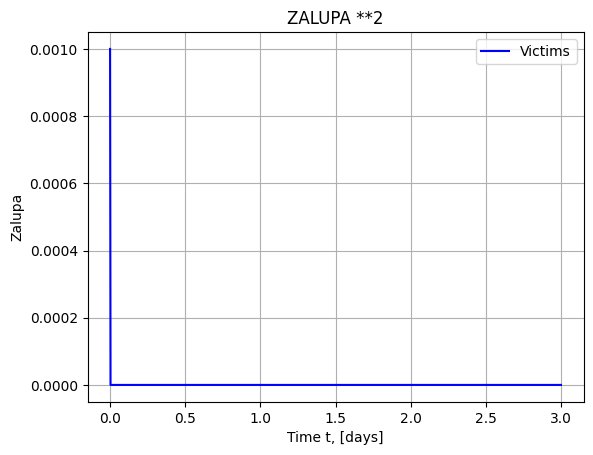

In [233]:
import matplotlib.pyplot as plt

t_array = np.linspace(0.,tmax, Nt)
list_x = []

ind = 1
for i in range(0, len(X)):
    list_x.append(X[i][ind])
    
    
plt.figure()
plt.grid()
plt.title("ZALUPA **2")
plt.plot(t_array, list_x, 'b', label = 'Victims')


plt.xlabel('Time t, [days]')
plt.ylabel('Zalupa')
plt.legend()

plt.show()